# Exercise 9.9

Exercise: Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

This is building off of what we did last week with the MNIST dataset. Here is a set up for the first part:

In [91]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import binary
import numpy as np
import os
import seaborn as sns
sns.set()

# to make this notebook's output stable across runs
np.random.seed(42)

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [92]:
from sklearn.datasets import fetch_mldata
from math import sqrt
mnist = fetch_mldata('MNIST original')
X = mnist["data"]
y = mnist["target"]
# print(y.shape)
# print(X.shape)
# print(y.shape)
# print(y[60000:])
print("Data set conatains {} images with {} features.".format(*X.shape))
print("The features are a {}x{} array of pixels".format(sqrt(X.shape[1]), sqrt(X.shape[1])))
##stated in chapter 3, First 60000 are training data, last 10000 are test data

Data set conatains 70000 images with 784 features.
The features are a 28.0x28.0 array of pixels


From the problem: split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing)

Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

Shape of full MNIST data
(70000, 784)
Shape of training data
(60000, 784)
Shape of test data
(10000, 784)


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished


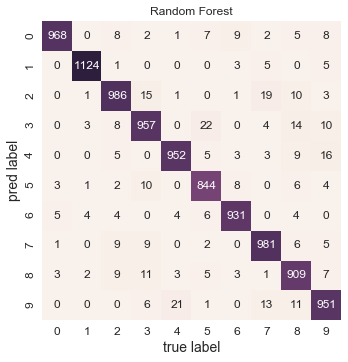

In [106]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
##stated in chapter 3, First 60000 are training data, last 10000 are test data

print('Shape of full MNIST data')
print(X.shape)
print('Shape of training data')
print(X_train.shape)
print('Shape of test data')
print(X_test.shape)

# create the classifier for the random forest and train it
rnd_for_clf = RandomForestClassifier(n_estimators=20, n_jobs=-1, verbose=1)
rnd_for_clf.fit(X_train, y_train)

# use our classifier to classify the test set of data
y_pred_for = rnd_for_clf.predict(X_test)

# plot the result
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred_for)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('pred label')
plt.title("Random Forest")
# save_fig("MNIST_random_forest")
plt.show()

As the print statement shows, the dataset still has 784 features.

We're done with the random forest without PCA. Let's try it with PCA to see how reducing dimensionality will improve things

We want an explained variance ratio of 95%

In [94]:
from six.moves import urllib
from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [95]:
d

154

This shows that 154 dimensions keep 95% of the variance.

In [110]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [111]:
pca.n_components_

154

In [112]:
np.sum(pca.explained_variance_ratio_)

0.95034997020786105

Now we're going to run PCA on the MNIST dataset, shrinking it to 154 features (originally 784).

In [115]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)
# print(X_reduced.shape)
# print(X_recovered.shape)
# print(y_train)

Now we are going to plot a snapshot of the data to see how reducing the dimensions has affected it.

In [116]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

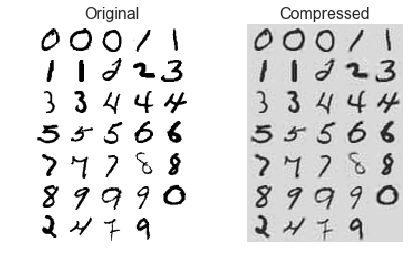

In [117]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)
# save_fig("mnist_compression_plot")
plt.show()

Overall, PCA keeps the dataset in tact

In [119]:
X_reduced_pca = X_reduced
print(X_reduced_pca.shape)
# print(X_reduced_pca[60000:])
# X = mnist["data"]
# y = mnist["target"]
print("Data set conatains {} images with {} features.".format(*X_reduced_pca.shape))
# print("The features are a {}x{} array of pixels".format(sqrt(X_reduced_pca.shape[1]), sqrt(X_reduced_pca.shape[1])))

(70000, 154)
Data set conatains 70000 images with 154 features.


Time to run another random forest, this time with the reduced data set

Shape of PCA-reduced MNIST data
(70000, 154)
Shape of PCA-reduced MNIST training data
(60000, 154)
Shape of PCA-reduced MNIST testing data
(10000, 154)


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.2s finished
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished


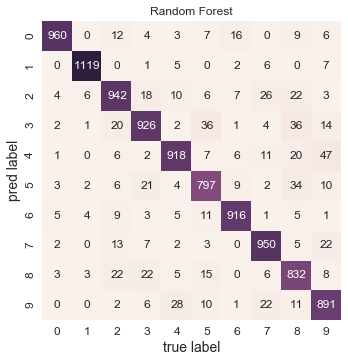

In [121]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = X_reduced_pca[:60000], X_reduced_pca[60000:], y[:60000], y[60000:]

print('Shape of PCA-reduced MNIST data')
print(X_reduced_pca.shape)
print('Shape of PCA-reduced MNIST training data')
print(X_train_pca.shape)
print('Shape of PCA-reduced MNIST testing data')
print(X_test_pca.shape)

# create the classifier for the random forest and train it
rnd_for_clf = RandomForestClassifier(n_estimators=20, n_jobs=-1, verbose=1)
rnd_for_clf.fit(X_train_pca, y_train_pca)

# use our classifier to classify the test set of data
y_pred_for_pca = rnd_for_clf.predict(X_test_pca)

# plot the result
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_pca, y_pred_for_pca)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('pred label')
plt.title("Random Forest")
# save_fig("MNIST_PCA_random_forest")
plt.show()